# Assignment 4 - Unsupervised Learning and Neural Networks

## *Ravitashaw Bathla*
Netid: rb369

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

**Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.**

**(a) Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation.**

**ANSWER**

In [88]:
import numpy as np

def kmeans(X, k, max_steps=50, convergence_threshold=0.001):
    '''kmeans

    Input:
    X: matrix of input data where each row represents a sample
    k: number of means to use
    max_steps: maximum number of iterations to run the algorithm
    convergence_threshold: if the means change less than this
                       value in an iteration, declare convergence
    Output:
    means: a matrix listing the k means
    cluster_assignment: a list of the cluster assignments for each samples
    dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean'''  
    #initlialize centroids
    centroids = initalize_centroids(X, k)
    cluster_assignment = np.zeros(X.shape[0])
    
    for step in range(max_steps):
        old_centroids = centroids

        #calculate distance from each centroid
        distance = calculate_distance(X, k, centroids)
        #assign clusters for each row based upon distance calculated
        cluster_assignment = get_cluster_assignment(X, distance, centroids)
        #calculate new centroids by taking mean of all the points in that cluster
        centroids = update_centroids(X, k, cluster_assignment)
        
        #if convergence threshold is greater than a value,break the loop
        if convergence_threshold==np.linalg.norm(old_centroids-centroids):
            break
        diss = calculate_dissimilarity(X, k, centroids, cluster_assignment)
    return cluster_assignment, centroids, diss

def calculate_dissimilarity(X, k, centroids, cluster_assignment):
    diss = np.zeros(X.shape[0])
    for c in range(k):
        diss[cluster_assignment==c] = np.linalg.norm(X[cluster_assignment==c]-centroids[c], axis=1)
        #print(diss)
    return np.sum(diss)
    
def calculate_distance(X, k, centroids):
    distance = np.zeros((X.shape[0], k))
    #print(centroids)
    for c in range(k):
        distance[:, c] = np.linalg.norm(X-centroids[c,:], axis=1)
    #print(distance)
    return distance
     
def get_cluster_assignment(X, distance, centroids):
    cluster_assignment = np.zeros(X.shape[0])
    cluster_assignment = np.argmin(distance, axis=1)
    return cluster_assignment
    
def initalize_centroids(X, k):
    np.random.RandomState(123)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k]]
    return centroids

def update_centroids(X, k, cluster_assignment):
    centroids = np.zeros((k, X.shape[1]))
    for c in range(k):
        centroids[c,:] = np.mean(X[cluster_assignment==c, :], axis=0)
    return centroids

In [34]:
#a = np.array([[1,2,1,2], [7,7,8,7], [0,2,2,1], [8,7,7,8]])
#kmeans(a, 2)

**(b) Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.**

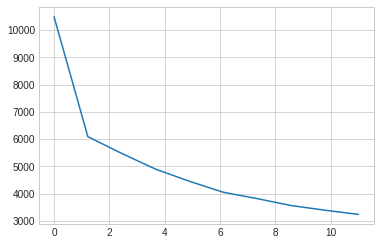

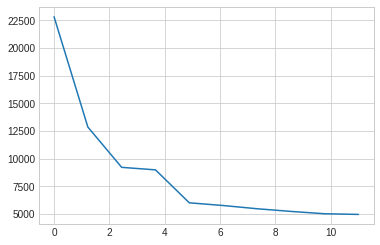

In [55]:
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

two_cluster_dataset, _ = datasets.make_blobs(n_samples=5000, n_features=2, centers=2,cluster_std=1.0, shuffle=True, random_state=0)
five_cluster_dataset, _ = datasets.make_blobs(n_samples=5000, n_features=2, centers=5,cluster_std=1.0, shuffle=True, random_state=0)

def plot_diss(dataset):
    dissimilarities = []
    for k in range(1, 11):
        _,_,diss = kmeans(dataset, k)
        dissimilarities.append(diss)
        
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, 11, 10)
    plt.plot(x, dissimilarities);
    plt.show()
    return

plot_diss(two_cluster_dataset)
plot_diss(five_cluster_dataset)

In [81]:
two_cluster_assignment,two_centroids,_ = kmeans(two_cluster_dataset, 2)
five_cluster_assignment,five_centroids,_ = kmeans(five_cluster_dataset, 5)

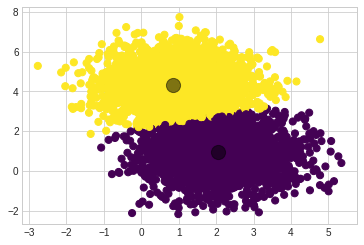

In [82]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(two_cluster_dataset[:,0], two_cluster_dataset[:,1], c=two_cluster_assignment, s=50, cmap='viridis');
plt.scatter(two_centroids[0,:], two_centroids[1, :], c='black', s=200, alpha=0.5);

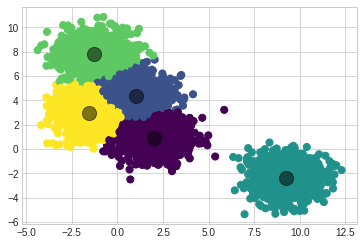

In [83]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(five_cluster_dataset[:,0], five_cluster_dataset[:,1], c=five_cluster_assignment, s=50, cmap='viridis');
plt.scatter(five_centroids[:,0], five_centroids[:,1], c='black', s=200, alpha=0.5);

**(c) Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.**

**ANSWER**

(1) K-means: In this unsupervised clustering technique, k centroids (or mediod) are initialized and the distance of all the points are calculated from the initialized centroids. The process is repeated and the centroids are updated after every step until convergence or a specified number of max steps.  The resulting centroids represents the center of the k clusters.

(2) Agglomerative Clustering: This is also an unsupervised clustering technique, however in this technique a bottom-up approach is followed. Each point is considered as an individual cluster and distance between each point is calculated. The closest points are merged together in one cluster and this process is repeated until all the points are covered (or only one cluster is left). The representation of this algorithm is similar to a tree and the number of clusters are determined by specifying a cut-off point during the bottom-up approach. 

(3) Gaussian Mixture Models: It is a probabilistic approach to unsupervised clusetering. The number of clusters are choosen, however instead of labelling each cluster as total ownership as in k-means, a probability is assigned for each datapoint correspoinding to all the clusters. The underlying distribution is assumed as Guassian and mean and covariance are calculated using EM algorithm with probabilistic clustering.

(4) DBSCAN: In this algorithm, a radius is defined for each cluster from each datapoint's center. There are three type of points, the inside point, outside point and on-the circle points. The datapoints are clustered together which are within the specified radius, the new center is updated and this process is repeated until all the points are classified into clusters. This method is outlier-proof. 

(5) Spectral Clustering: This algorithm works by creating a graph of the datapoints and its corresponding Laplacian matrix, computing eigenvectors of the Laplacian matrix, and then running k-means to separate the classes. By projecting the data onto a lower dimension, spectral clustering can often outperform k-means and other clustering algorithms in certain situations.

**(d) Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:**
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own* 

**ANSWER**

In [1]:
import pandas as pd

aggregation = pd.read_csv('./data/Aggregation.txt', sep='\t' ,header=None)
compound = pd.read_csv('./data/Compound.txt', sep='\t', header=None)
d31 = pd.read_csv('./data/D31.txt', sep='\t', header=None)
jain = pd.read_csv('./data/jain.txt', sep='\t', header=None)

aggregation = aggregation.drop(2, axis=1)
compound = compound.drop(2, axis=1)
d31 = d31.drop(2, axis=1)
jain = jain.drop(2, axis=1)

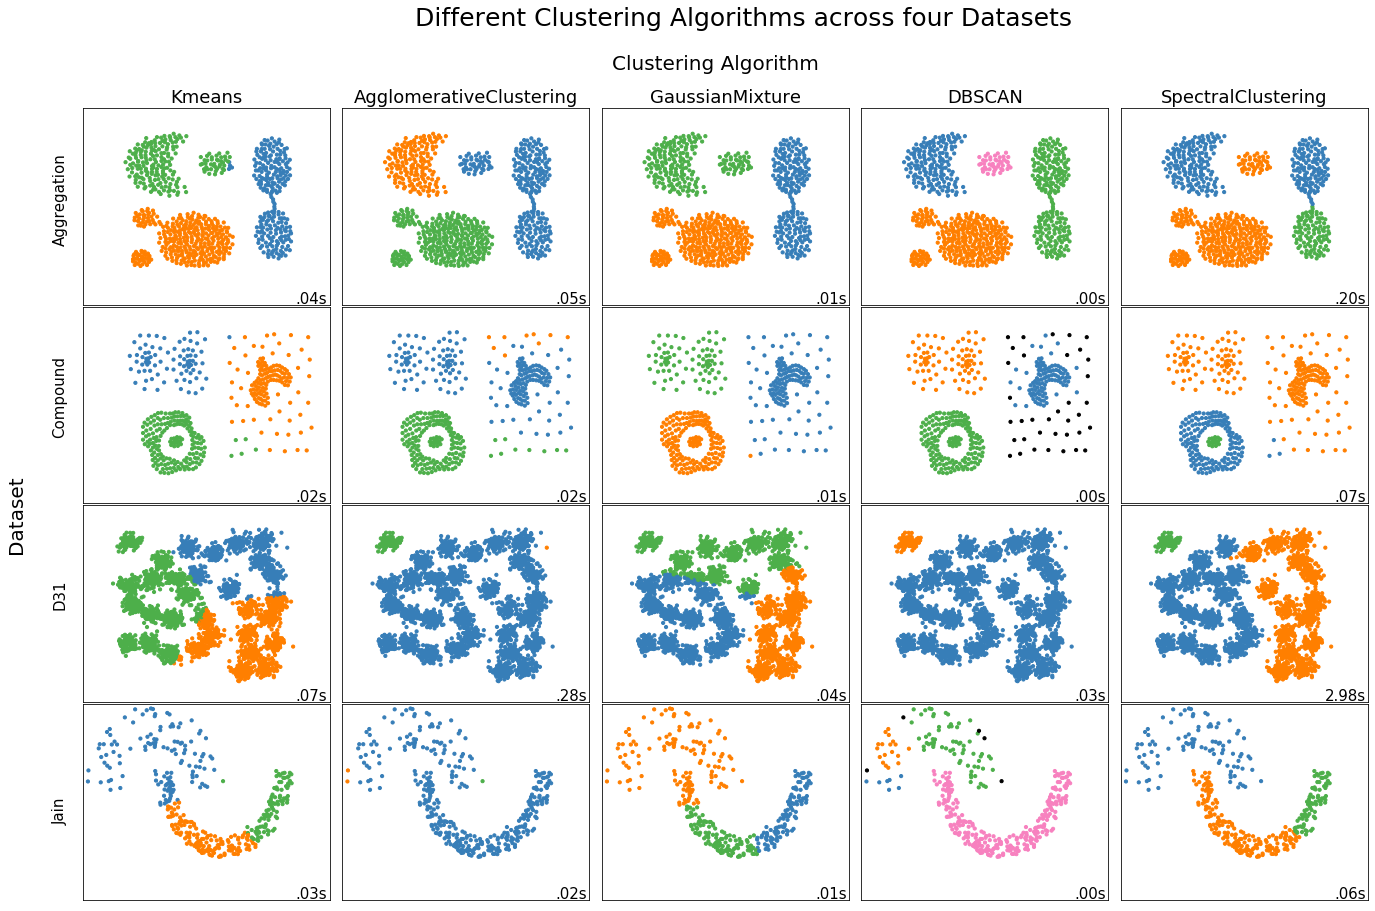

In [16]:
## Reference from Scikit official documentation for plotting and comparing datasets with different algorithms
##https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
import time
import warnings
from sklearn import cluster, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

fig = plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=0.05, right=0.9, bottom=0.02, top=0.9, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [
    (aggregation),
    (compound),
    (d31),
    (jain)]

default_base = {'quantile': .3,
            'eps': .3,
            'n_neighbors': 10,
            'n_clusters': 3}
    
for i_dataset, (dataset) in enumerate(datasets):

    X = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=default_base['quantile'])
    
    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=default_base['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    kmeans = KMeans(n_clusters=default_base['n_clusters'], random_state=0)
    agg_clustering = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=default_base['n_clusters'], connectivity=connectivity)
    gmm = mixture.GaussianMixture(n_components=default_base['n_clusters'], covariance_type='full')
    dbscan = cluster.DBSCAN(eps=default_base['eps'])
    spectral = cluster.SpectralClustering(n_clusters=default_base['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")

    clustering_algorithms = (
        ('Kmeans', kmeans),
        ('AgglomerativeClustering', agg_clustering),
        ('GaussianMixture', gmm),
        ('DBSCAN', dbscan),
        ('SpectralClustering', spectral),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

fig.text(0.03, 0.12, 'Jain', va='center', rotation='vertical', fontsize=15)
fig.text(0.03, 0.36, 'D31', va='center', rotation='vertical', fontsize=15)
fig.text(0.03, 0.58, 'Compound', va='center', rotation='vertical', fontsize=15)
fig.text(0.03, 0.80, 'Aggregation', va='center', rotation='vertical', fontsize=15)
fig.text(0.27, 1, 'Different Clustering Algorithms across four Datasets', va='center', rotation='horizontal', fontsize=25)
fig.text(0.4, .95, 'Clustering Algorithm', va='center', rotation='horizontal', fontsize=20)
fig.text(0,.45, 'Dataset', va='center', rotation='vertical', fontsize=20)
plt.show()

## Performance

**Aggregation** : DBSCAN seems to work best for this dataset followed by Agglomerative Clustering. The number of clusters seems more concise from DBSCAN in comparision to others as it is more susceptible to handling outliers. 

**Compound** : the Gaussian mixture model seems to work the best. GMM is a probabilistic model so considering the bizzarre distribution of datapoints, GMM has performed the best. K-means was close enough but since K-means provides concrete membership, GMM has performed better by labelling only one point (far lower left in right cluster) separately. 

**D31**: DBSCAN and Agglomerative Clustering have similar best performance. Both of these algorithms are good in identifying outlier cluster apart from the main big cluster using bottom-up approach. 

**Jain**: Spectral Clustering seems to perform the best with clear separation of the two main clusters. The number of clusters in Spectral has been set as 3, so there is a within separation in one of the clusters. In addition, k-means and GMM model performs decent with number of clusters as 3. However, these two models have categorized the head of the lower cluster with the head of upper cluster. Therefore, Spectral Clustering performance can be portrayed as best.

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a) Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).**

**ANSWER**

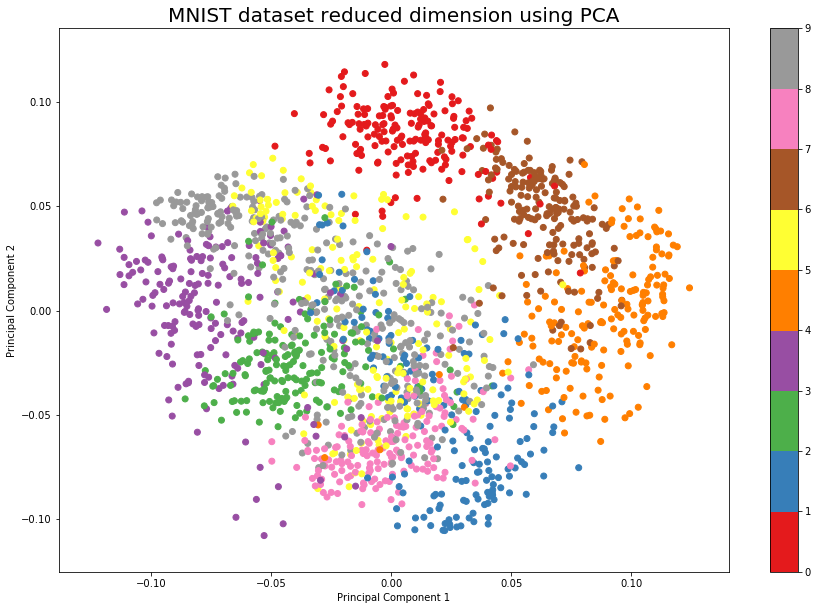

In [55]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

mnist = load_digits()
X = mnist.data / 255.0
y = mnist.target

df = pd.DataFrame(X)

pca = PCA(n_components=2)
result = pca.fit_transform(df.values)

# Plot
plt.figure(figsize=(15,10))
plt.scatter(result[:,0], result[:,1], c=y, cmap='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST dataset reduced dimension using PCA', fontsize=20)
plt.colorbar();

**(b) Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question**

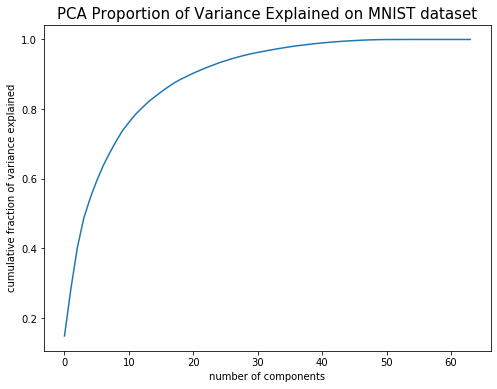

In [60]:
pca = PCA().fit(df.values)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Proportion of Variance Explained on MNIST dataset', fontsize=15)
plt.xlabel('number of components')
plt.ylabel('cumulative fraction of variance explained');

In [64]:
np.sum(pca.explained_variance_ratio_[:2])

0.2850936482369929

Fraction of Variance explained by first two principal components = 0.2850936482369929

In [66]:
np.sum(pca.explained_variance_[:2])

0.005270660161163389

**(c) Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).**

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.048776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.065109
[t-SNE] KL divergence after 300 iterations: 0.931472


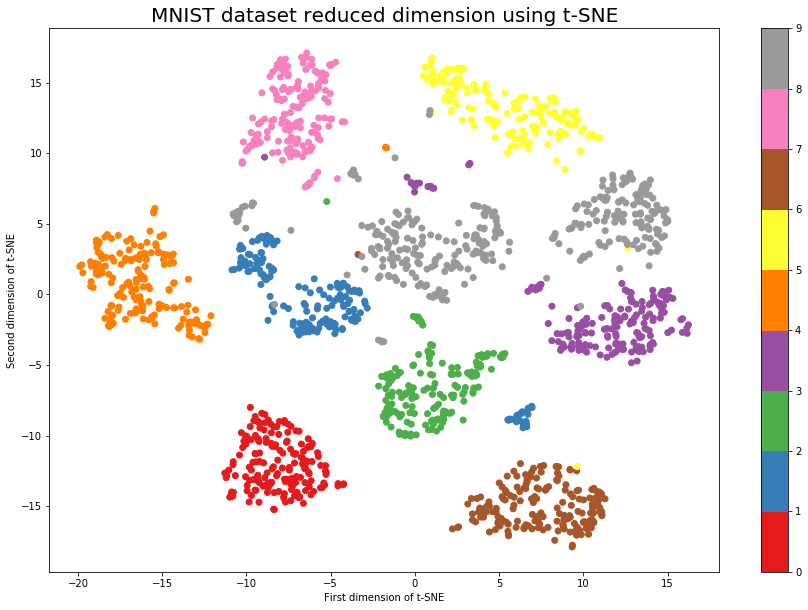

In [69]:
from sklearn.manifold import TSNE

df = pd.DataFrame(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
results = tsne.fit_transform(df.values)

plt.figure(figsize=(15,10))
plt.scatter(results[:,0], results[:,1], c=y, cmap='Set1')
plt.xlabel('First dimension of t-SNE')
plt.ylabel('Second dimension of t-SNE')
plt.title('MNIST dataset reduced dimension using t-SNE', fontsize=20)
plt.colorbar();

**(d) Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.**

**ANSWER**



## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

In [ ]:
class myNeuralNetwork(object):
    
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate=):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
            
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
    
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
    
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss functionof the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of th loss/cost associated with x,y
                      and the current model weights
        '''
        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computer by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
    
    def fit(self, X, y, max_epochs=, learning_rate=, get_validation_loss=):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
            
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
    
    def predict(self, X, decision_thresh=):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
    
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
    
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''


**ANSWER**